# DA5401 A5: Visualizing Data Veracity Challenges in Multi-Label Classification


## Part A: Preprocessing and Initial Setup

### Data Loading 

In [125]:
import pandas as pd
import numpy as np
from matplotlib.patches import Patch
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

data = pd.read_csv("/home/aks_new/Data_Analytics_assignment/Assignment05/yeast.csv")


In [126]:
data.head()

Att1      Att2      Att3      Att4      Att5      Att6      Att7  \
0  0.004168 -0.170975 -0.156748 -0.142151  0.058781  0.026851  0.197719   
1 -0.103956  0.011879 -0.098986 -0.054501 -0.007970  0.049113 -0.030580   
2  0.509949  0.401709  0.293799  0.087714  0.011686 -0.006411 -0.006255   
3  0.119092  0.004412 -0.002262  0.072254  0.044512 -0.051467  0.074686   
4  0.042037  0.007054 -0.069483  0.081015 -0.048207  0.089446 -0.004947   

       Att8      Att9     Att10  ...  Class5  Class6  Class7  Class8  Class9  \
0  0.041850  0.066938 -0.056617  ...       0       0       1       1       0   
1 -0.077933 -0.080529 -0.016267  ...       0       0       0       0       0   
2  0.013646 -0.040666 -0.024447  ...       0       0       0       0       0   
3 -0.007670  0.079438  0.062184  ...       0       0       0       0       0   
4  0.064456 -0.133387  0.068878  ...       1       1       0       0       0   

   Class10  Class11  Class12  Class13  Class14  
0        0        0        1        1        0  
1        0        0        0        0        0  
2        0        0        1        1        0  
3        0        0        0        0        0  
4        0        0        0        0        0  

[5 rows x 117 columns]

In [127]:
columns_name = data.columns.tolist()
print(columns_name)


['Att1', 'Att2', 'Att3', 'Att4', 'Att5', 'Att6', 'Att7', 'Att8', 'Att9', 'Att10', 'Att11', 'Att12', 'Att13', 'Att14', 'Att15', 'Att16', 'Att17', 'Att18', 'Att19', 'Att20', 'Att21', 'Att22', 'Att23', 'Att24', 'Att25', 'Att26', 'Att27', 'Att28', 'Att29', 'Att30', 'Att31', 'Att32', 'Att33', 'Att34', 'Att35', 'Att36', 'Att37', 'Att38', 'Att39', 'Att40', 'Att41', 'Att42', 'Att43', 'Att44', 'Att45', 'Att46', 'Att47', 'Att48', 'Att49', 'Att50', 'Att51', 'Att52', 'Att53', 'Att54', 'Att55', 'Att56', 'Att57', 'Att58', 'Att59', 'Att60', 'Att61', 'Att62', 'Att63', 'Att64', 'Att65', 'Att66', 'Att67', 'Att68', 'Att69', 'Att70', 'Att71', 'Att72', 'Att73', 'Att74', 'Att75', 'Att76', 'Att77', 'Att78', 'Att79', 'Att80', 'Att81', 'Att82', 'Att83', 'Att84', 'Att85', 'Att86', 'Att87', 'Att88', 'Att89', 'Att90', 'Att91', 'Att92', 'Att93', 'Att94', 'Att95', 'Att96', 'Att97', 'Att98', 'Att99', 'Att100', 'Att101', 'Att102', 'Att103', 'Class1', 'Class2', 'Class3', 'Class4', 'Class5', 'Class6', 'Class7', 'Class8

In [128]:
# Define feature and label columns
feature_columns = [f"Att{i}" for i in range(1, 104)]      
label_columns   = [f"Class{i}" for i in range(1, 15)]    # Class1 ... Class14

# converting to numpy matrices
X = data[feature_columns].values   
y = data[label_columns].values

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (2417, 103)
y shape: (2417, 14)


### Label Selection for Visualization

In [129]:
# Convert NumPy y back to DataFrame
Y = pd.DataFrame(y, columns=label_columns)

single_label_rows = Y[Y.sum(axis=1) == 1]
single_label_counts = single_label_rows.sum().sort_values(ascending=False)

print(single_label_counts)

Class1     32
Class2      0
Class3      0
Class4      0
Class5      0
Class6      0
Class7      0
Class8      0
Class9      0
Class10     0
Class11     0
Class12     0
Class13     0
Class14     0
dtype: int64


In [130]:
multi_label_rows = Y[Y.sum(axis=1) > 1]

# Step 1: Represent each row's labels as a tuple of class names
def row_to_combo(row):
    return tuple(row.index[row == 1])  # e.g., ('Class2', 'Class5')

multi_label_combos = multi_label_rows.apply(row_to_combo, axis=1)

# Step 2: Count frequency of each combination
combo_counts = multi_label_combos.value_counts()

# Show top 5 combinations
print("\nTop 5 multi-label combinations:")
print(combo_counts.head())


Top 5 multi-label combinations:
(Class3, Class4, Class12, Class13)    237
(Class4, Class5, Class12, Class13)    233
(Class1, Class2, Class12, Class13)    172
(Class1, Class2)                      131
(Class2, Class3, Class12, Class13)    117
Name: count, dtype: int64


In [131]:
top2_single = single_label_counts.index[:1].tolist()

# Most frequent multi-label combination
top_combo = combo_counts.index[0]

print("Top 2 single-labels:", top2_single)
print("Most frequent multi-label combo:", top_combo)

Top 2 single-labels: ['Class1']
Most frequent multi-label combo: ('Class3', 'Class4', 'Class12', 'Class13')


In [132]:
def assign_category(row):
    # Case A: single-label
    if row.sum() == 1:
        cls = row.index[row == 1][0]
        return cls if cls in top2_single else "Other"
    
    # Case B: multi-label → check top combo
    if tuple(row.index[row == 1]) == top_combo:
        return "Top_MultiCombo"
    
    # Case C: all others
    return "Other"
Y = Y.apply(pd.to_numeric, errors="coerce")
Y["TargetColor"] = Y.apply(assign_category, axis=1)

print("\nValue counts of TargetColor:")
print(Y["TargetColor"].value_counts())


Value counts of TargetColor:
TargetColor
Other             2148
Top_MultiCombo     237
Class1              32
Name: count, dtype: int64


In [133]:
Y.head(5)

Class1  Class2  Class3  Class4  Class5  Class6  Class7  Class8  Class9  \
0       0       0       0       0       0       0       1       1       0   
1       0       0       1       1       0       0       0       0       0   
2       0       1       1       0       0       0       0       0       0   
3       0       0       1       1       0       0       0       0       0   
4       0       0       1       1       1       1       0       0       0   

   Class10  Class11  Class12  Class13  Class14 TargetColor  
0        0        0        1        1        0       Other  
1        0        0        0        0        0       Other  
2        0        0        1        1        0       Other  
3        0        0        0        0        0       Other  
4        0        0        0        0        0       Other

### Scaling

**Why Scaling is Crucial Before Applying Distance-Based Dimensionality Reduction**

Scaling is **essential** before applying techniques like **Isomap**, **t-SNE**, or **MDS** because these algorithms rely on **pairwise distance calculations** to represent the data’s structure in a lower-dimensional space. If features have **different ranges or units** (e.g., one feature ranges from 0–1 while another ranges from 0–1000), the features with larger numeric scales will **dominate the distance computation**, leading to distorted neighborhood relationships and misleading visualizations.

By applying **scaling or standardization**, all features are brought to a **comparable scale**, ensuring each contributes **equally** to the distance metric. This preserves the true **geometry and relationships** among data points, allowing the dimensionality reduction algorithm to uncover meaningful global and local structures in the dataset.


In [134]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Shape of X_scaled:", X_scaled.shape)


Shape of X_scaled: (2417, 103)


###  Part A Results

- **Feature Matrix (`X_scaled`)**
  - Description: Standardized feature matrix  
  - Shape: **(2417, 103)**  

- **Target Matrix (`Y`)**
  - Description: Multi-label target matrix with an additional categorical column  
  - Shape: **(2417, 15)**  
  - Columns:  
    - Class1 … Class14 → multi-label binary classes  
    - TargetColor → categorical target for visualization  


## Part B: t-SNE and Veracity Inspection

### t-SNE Implementation & Visualisation

In [135]:
X = pd.DataFrame(X_scaled)


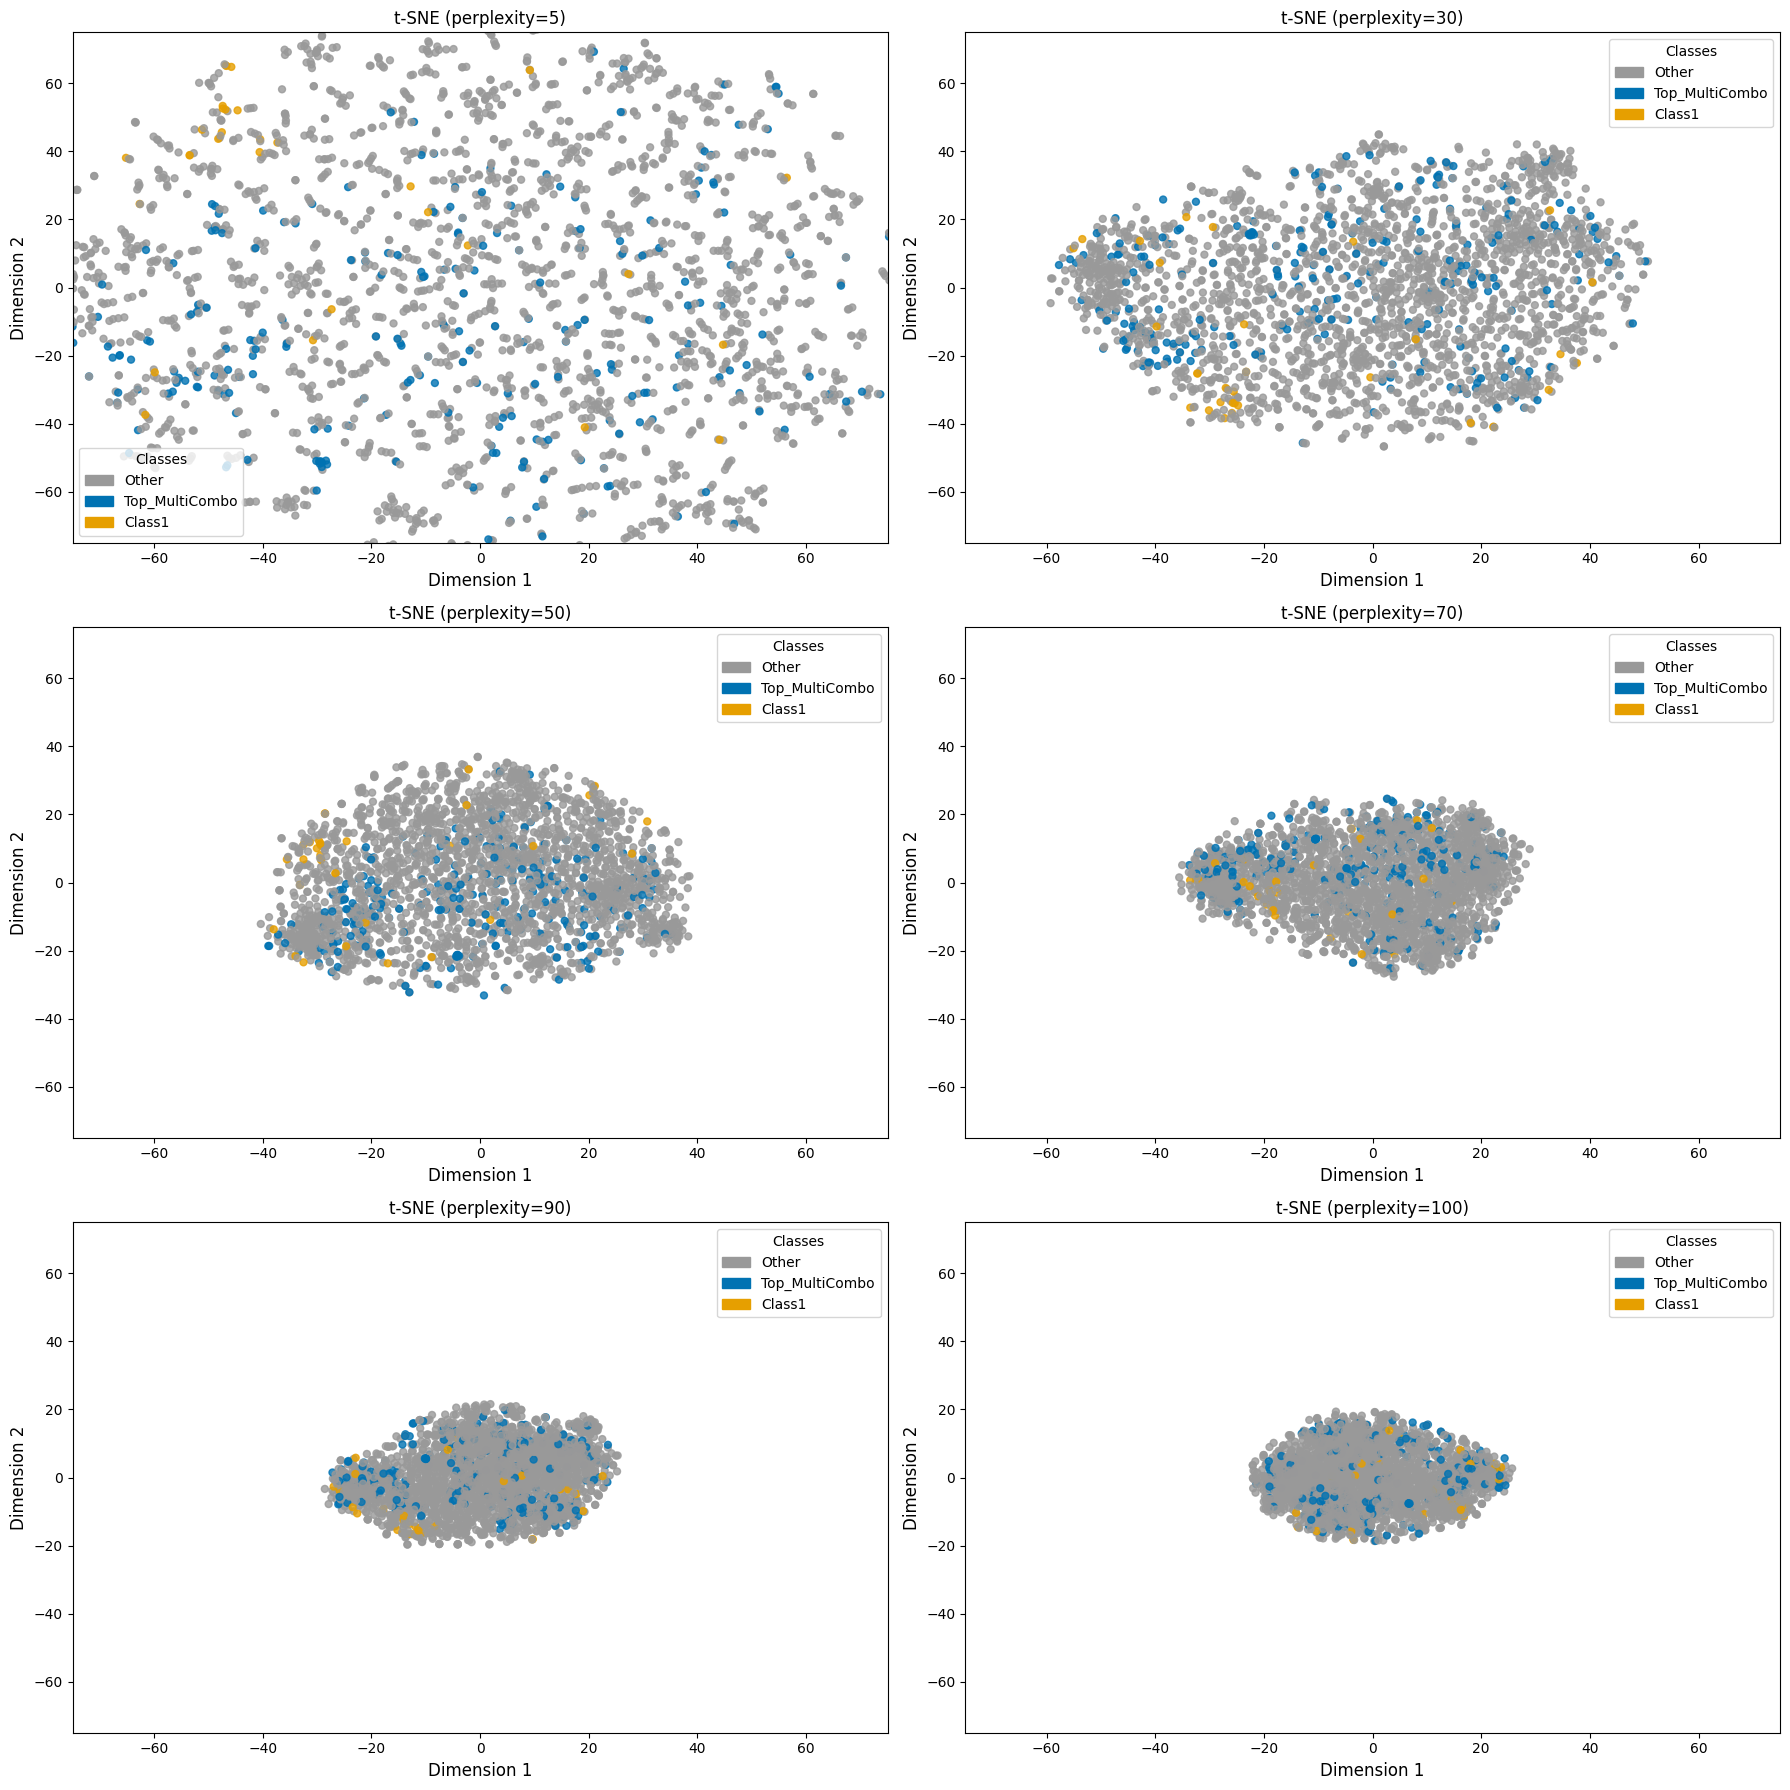

In [136]:
from matplotlib.patches import Patch
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

perplexities = [5, 30, 50,70,90,100]  # test different perplexity values
tsne_results = {}
colors = {
    'Other': '#999999',          # gray
    'Top_MultiCombo': '#0072B2', # blue
    'Class1': '#E69F00'          # orange
}
col=[colors[i]     for i in Y['TargetColor']]
handles = [Patch(color=colors[name], label=name) for name in colors]
fig, axes = plt.subplots(3, len(perplexities)//3, figsize=(18, 18))
axes = axes.flatten()
for  perp,ax in zip(perplexities,axes):
    tsne=TSNE(n_components=2, perplexity=perp, random_state=12)
    X_tsne = tsne.fit_transform(X_scaled)
    ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=col, s=25,alpha=0.8)
    ax.set_title(f"t-SNE (perplexity={perp})")
    ax.set_xlabel("Dimension 1",fontsize=12)
    ax.set_ylabel("Dimension 2",fontsize=12)
    ax.set_xlim(-75, 75)
    ax.set_ylim(-75, 75)
    ax.legend(handles=handles, title="Classes")   
fig.subplots_adjust(hspace=0.4,wspace=0.4)
plt.tight_layout()
plt.show()


**Effect of Perplexity on t-SNE Visualization**

The above plots demonstrate how the **t-SNE** representation of the Yeast dataset evolves with varying **perplexity** values — specifically 5, 30, 50, 70, and 100. In this figure, the **X and Y axes are restricted to fixed ranges**, ensuring a consistent frame of reference across all perplexity settings. This allows for a more controlled comparison of the **structural compactness and neighborhood continuity** as the algorithm adjusts its balance between local and global attention.

At **low perplexity (5)**, t-SNE emphasizes **fine-grained local neighborhoods**, producing a scattered and fragmented layout with weak global cohesion. Individual proteins form micro-clusters, but the broader manifold structure is poorly preserved.

As the **perplexity increases to 30 and 50**, the embeddings become **more cohesive and interpretable**, revealing better-organized clusters. These settings achieve a balanced trade-off — preserving **local similarity among related samples (e.g., `Class1` and `Top_MultiCombo`)** while maintaining **global manifold consistency**. The resulting visual structure captures biologically relevant proximity patterns within the data.

Beyond **perplexity = 70**, the embeddings exhibit **over-smoothing**, with dense and compact distributions that obscure inter-class separations. The compression effect suggests that too large a neighborhood size dilutes local distinctions, leading to loss of fine structural information.

Overall, this controlled-range experiment indicates that **moderate perplexity values (30–50)** yield the most **stable, interpretable, and biologically meaningful** visualization of the Yeast feature space.


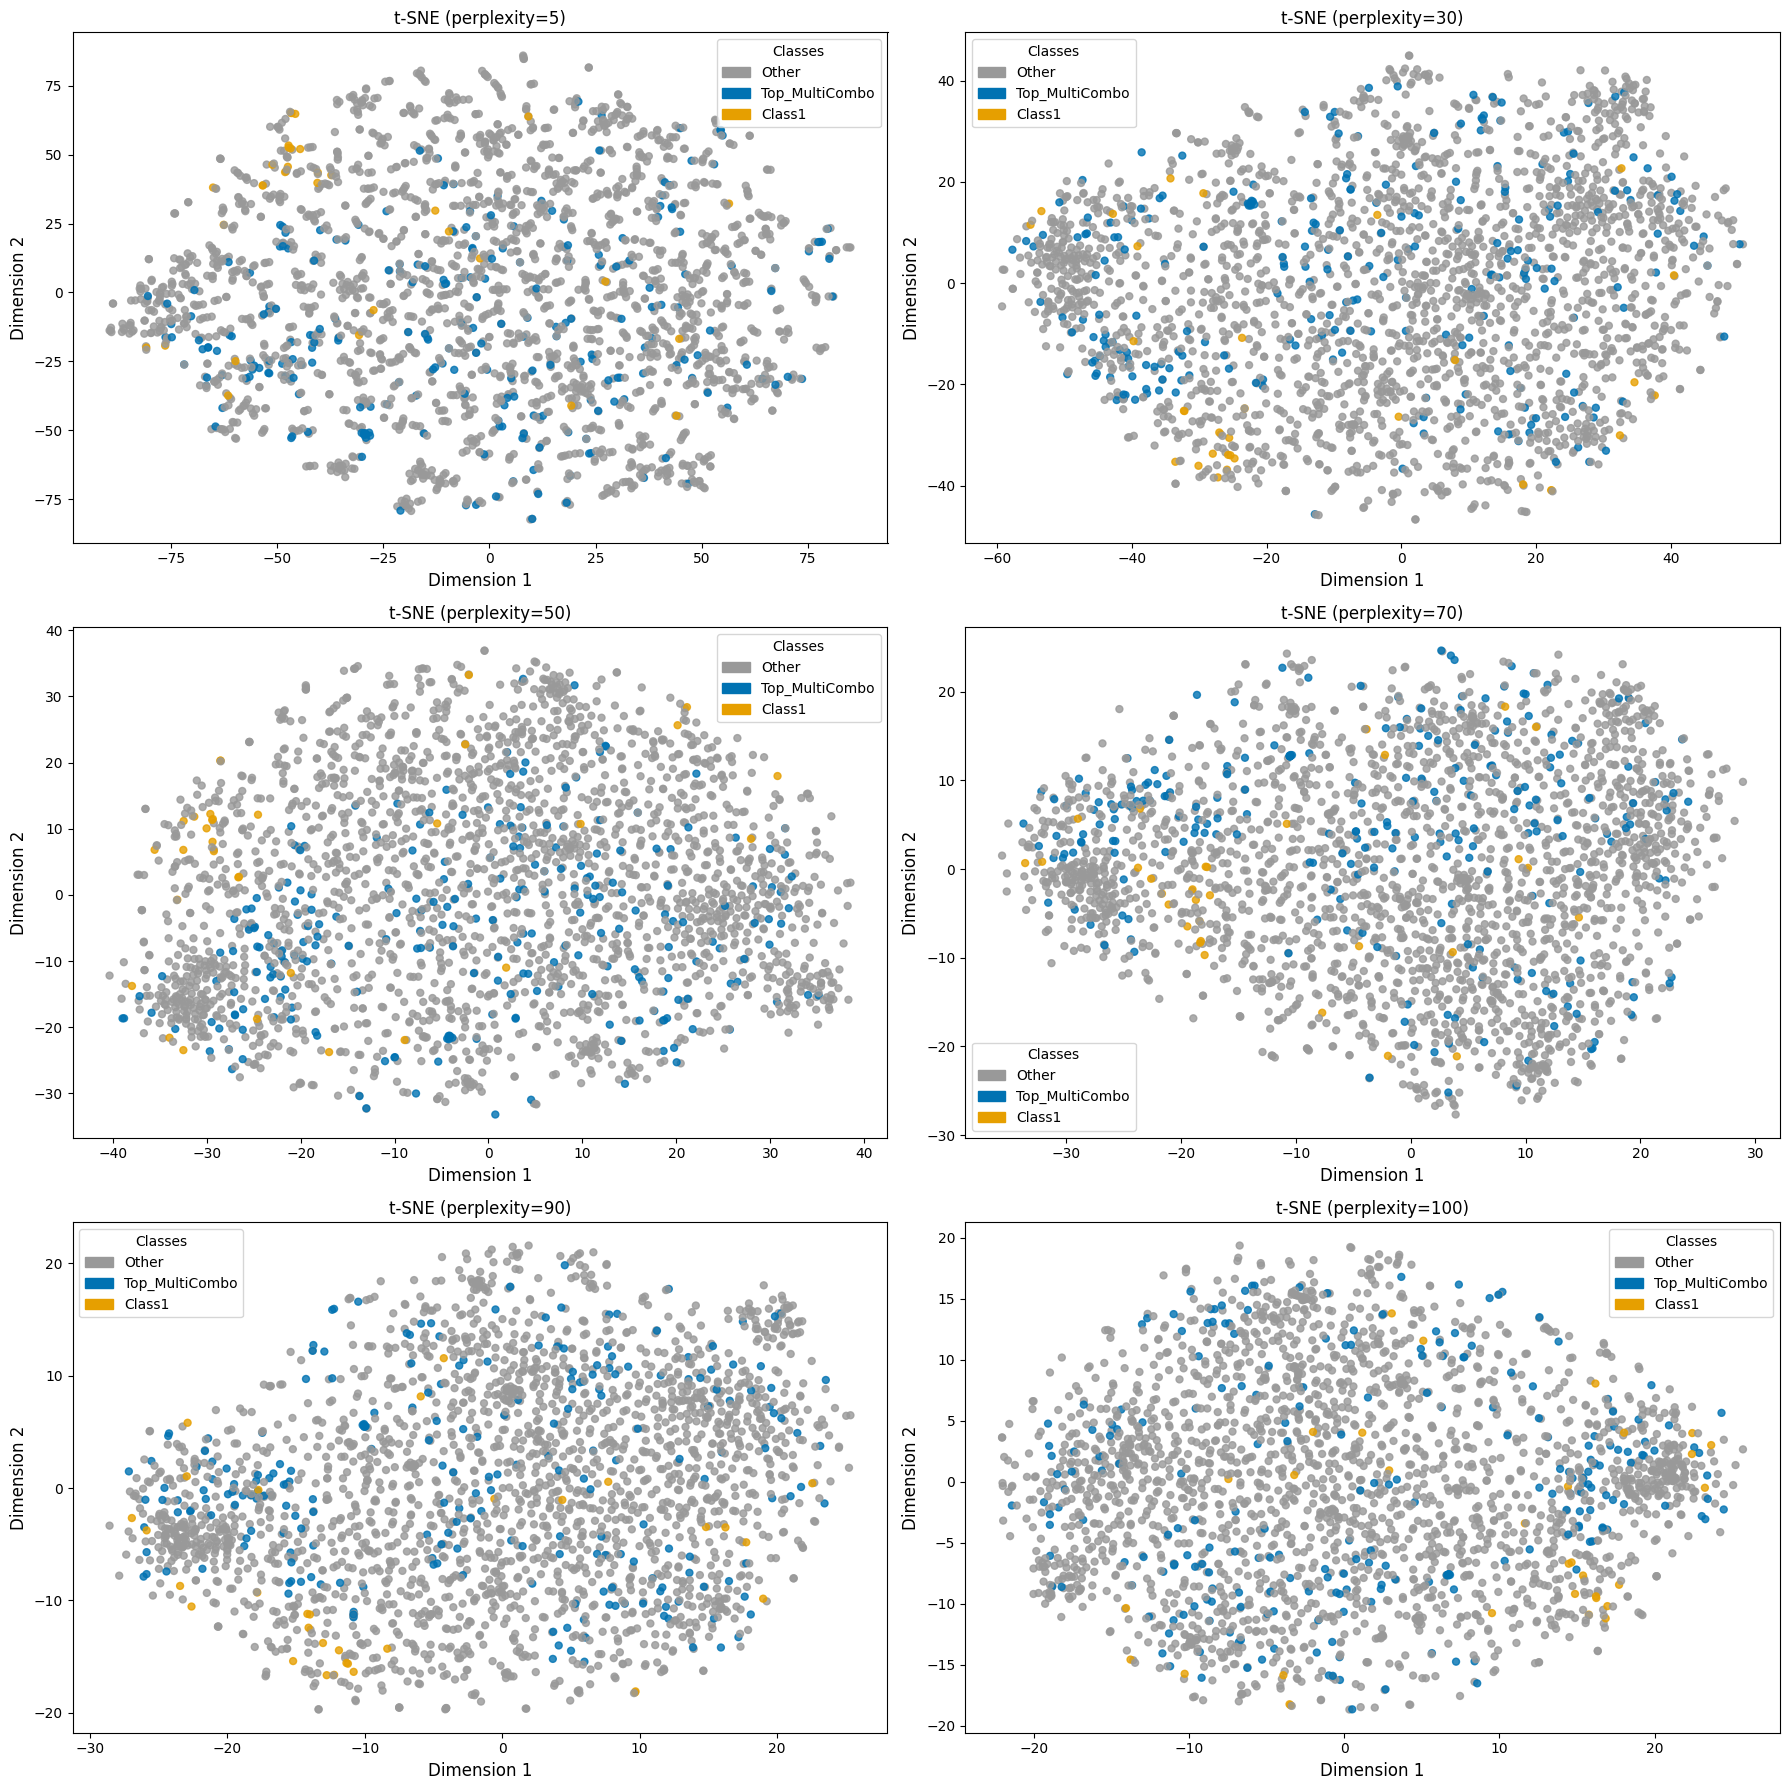

In [137]:

from sklearn.manifold import TSNE


perplexities = [5, 30, 50,70,90,100]  # test different perplexity values
tsne_results = {}
colors = {
    'Other': '#999999',          # gray
    'Top_MultiCombo': '#0072B2', # blue
    'Class1': '#E69F00'          # orange
}
col=[colors[i]     for i in Y['TargetColor']]
handles = [Patch(color=colors[name], label=name) for name in colors]
fig, axes = plt.subplots(3, len(perplexities)//3, figsize=(18, 18))
axes = axes.flatten()
for  perp,ax in zip(perplexities,axes):
    tsne=TSNE(n_components=2, perplexity=perp, random_state=12)
    X_tsne = tsne.fit_transform(X_scaled)
    ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=col, s=25,alpha=0.8)
    ax.set_title(f"t-SNE (perplexity={perp})")
    ax.set_xlabel("Dimension 1",fontsize=12)
    ax.set_ylabel("Dimension 2",fontsize=12)
    
    ax.legend(handles=handles, title="Classes")   
fig.subplots_adjust(hspace=0.4,wspace=0.4)
plt.tight_layout()
plt.show()

**Analysis of Local vs. Global Structure with Varying Axis Ranges**

In the second set of visualizations, the **X and Y axis ranges were adjusted dynamically** for each perplexity level to provide a deeper insight into both **local neighborhood structures** and **global spatial relationships** across the dataset. This approach complements the previous fixed-range comparison by revealing how t-SNE naturally scales and distributes clusters under different neighborhood constraints.

At **perplexity = 5**, t-SNE produces a highly dispersed embedding, highlighting **local proximity relationships** but sacrificing any discernible global structure. As the perplexity increases to **30**, the visualization achieves **clearer and more stable clusters**, where biologically related samples group meaningfully in lower-dimensional space. This setting demonstrates an effective equilibrium between **local density preservation** and **global topological continuity**.

At **higher perplexity levels (50–100)**, the embeddings become progressively more compact, with clusters merging and intra-class boundaries fading. This behavior signifies that the model is considering **too many neighbors**, thus flattening the manifold and reducing the ability to detect fine-grained differences.

By combining both fixed-range and adaptive-range visual analyses, we observe that **perplexity ≈ 30** consistently delivers the **most informative and balanced low-dimensional representation**. It maintains **local coherence**, preserves **global geometry**, and reflects **meaningful biological clustering tendencies** in the Yeast dataset’s high-dimensional feature space.


**Choosing the Optimal Perplexity Value**

The second set of t-SNE visualizations reaffirms the impact of the **perplexity** parameter on neighborhood preservation and cluster clarity.  

At **perplexity = 5**, data points appear disjointed, emphasizing extremely local variations with no clear overall structure. When the perplexity increases to **30**, the visualization becomes more meaningful — distinct clusters emerge, and local-to-global balance is well maintained.  

With **perplexity = 50 or higher**, the embedding grows more compact, merging neighboring clusters and slightly diminishing the visibility of class boundaries. By **perplexity = 90–100**, the plot loses interpretability as all samples converge into a dense core.  

Based on both visual clarity and cluster separability, **perplexity = 30** emerges as the **optimal choice** for this dataset. It preserves meaningful neighborhood relations while maintaining the broader global organization of protein localization patterns in the Yeast data.


### Veracity Inspection 



This section inspects the **veracity** of the t-SNE results for the Yeast dataset by examining data reliability and the integrity of the embedding. The visualization provides valuable insight into the **quality of the labels**, **presence of outliers**, and **difficulty of classification** across various regions of the manifold. The analysis focuses on three aspects: **noisy or ambiguous labels**, **outliers**, and **hard-to-learn samples**.

---
**1. Noisy / Ambiguous Labels**
In the t-SNE visualization, certain regions display **points of one color (e.g., `Class1` or `Top_MultiCombo`) embedded within a dense cluster of another color (mostly `Other`)**. These mixed regions suggest potential **label ambiguity** or **biological overlap** between localization categories.  
Such cases are common in the Yeast dataset, as many proteins exhibit **multi-compartment localization** (e.g., cytoplasm and nucleus) due to multifunctional behavior or incomplete experimental annotation. These ambiguous labels may arise from:
- **Experimental noise** during protein tagging or sequencing.  
- **Incomplete annotations** for proteins localized to multiple organelles.  
- **Feature similarity** between biologically adjacent compartments.  

Hence, these mixed regions likely represent **biologically plausible overlaps** rather than labeling errors, yet they still introduce noise that affects model generalization.

---

**2. Outliers**
A few **isolated points and tiny clusters** are visible at the peripheries of the embedding across all perplexity settings, particularly at **lower perplexities (5 and 30)**. These are probable **outliers**, representing proteins with **atypical expression patterns** or **rare localization profiles**.  
Possible interpretations include:
- **Unique or low-abundance proteins** whose features deviate from typical class patterns.  
- **Measurement artifacts** or **data preprocessing inconsistencies**.  
- **Proteins with incomplete feature vectors** or uncharacteristic amino acid sequences.  

In biological terms, these could correspond to **specialized or mislocalized proteins**, which are essential for detecting **novel localization mechanisms** or **data inconsistencies** in the dataset.

---

**3. Hard-to-Learn Samples**
In several regions, especially around the **dense center of the embedding (perplexity 30–50)**, the visualization reveals areas where **colors are thoroughly mixed**  primarily `Other`, `Class1`, and `Top_MultiCombo`. These represent **hard-to-learn samples** where functional boundaries are not clearly defined in the feature space.  
A simple classifier (e.g., logistic regression or decision tree) would likely **struggle** in these areas because:
- The **feature overlap** prevents a clear linear separation between classes.  
- **High inter-class similarity** indicates that the features used (sequence descriptors, motif frequencies, etc.) are not fully discriminative.  
- The data may reflect **continuous biological transitions** rather than discrete class boundaries.  

Such mixed regions emphasize the need for **advanced classifiers** such as ensemble models, deep learning, or label correlation-aware approaches to effectively capture these **non-linear, interdependent patterns**.

---

**Summary Insight**
The veracity analysis of the Yeast dataset’s t-SNE visualization reveals that:
- **Noisy/Ambiguous regions** reflect biologically valid overlaps but complicate label consistency.  
- **Outliers** highlight rare or atypical protein behavior that warrants further biological review.  
- **Hard-to-learn regions** underscore the **intrinsic complexity** of protein localization prediction and justify using **multi-label and non-linear models** over simple classifiers.

Together, these findings confirm that while t-SNE provides valuable structural insight, **the Yeast dataset is inherently noisy, overlapping, and multi-modal**, requiring careful preprocessing, robust modeling, and biological interpretation for reliable classification.


## Part C: Isomap and Manifold Learning

### Isomap Implementation & Visualisation

**Fundamental Difference Between Isomap and t-SNE in Preserving Data Structure**

- **Isomap** is a **global manifold learning** technique. It computes **geodesic distances** (shortest paths along the data manifold) between all points, ensuring that the **overall shape and connectivity** of the high-dimensional space are maintained in the low-dimensional embedding. As a result, Isomap captures how distant clusters relate to each other, revealing the **global topology** of the dataset.

- **t-SNE**, on the other hand, is a **local structure-preserving** method. It converts pairwise distances into conditional probabilities representing similarities and tries to ensure that **points close together in high-dimensional space remain close in the embedding**. However, it pays less attention to preserving distances between far-apart points, often rearranging clusters arbitrarily to optimize local relationships. This makes t-SNE excellent at uncovering **fine-grained local clusters**, but less reliable for interpreting **global organization**.

In short:  
> **Isomap** → preserves *global geometry* (manifold shape)  
> **t-SNE** → preserves *local neighborhoods* (cluster detail)


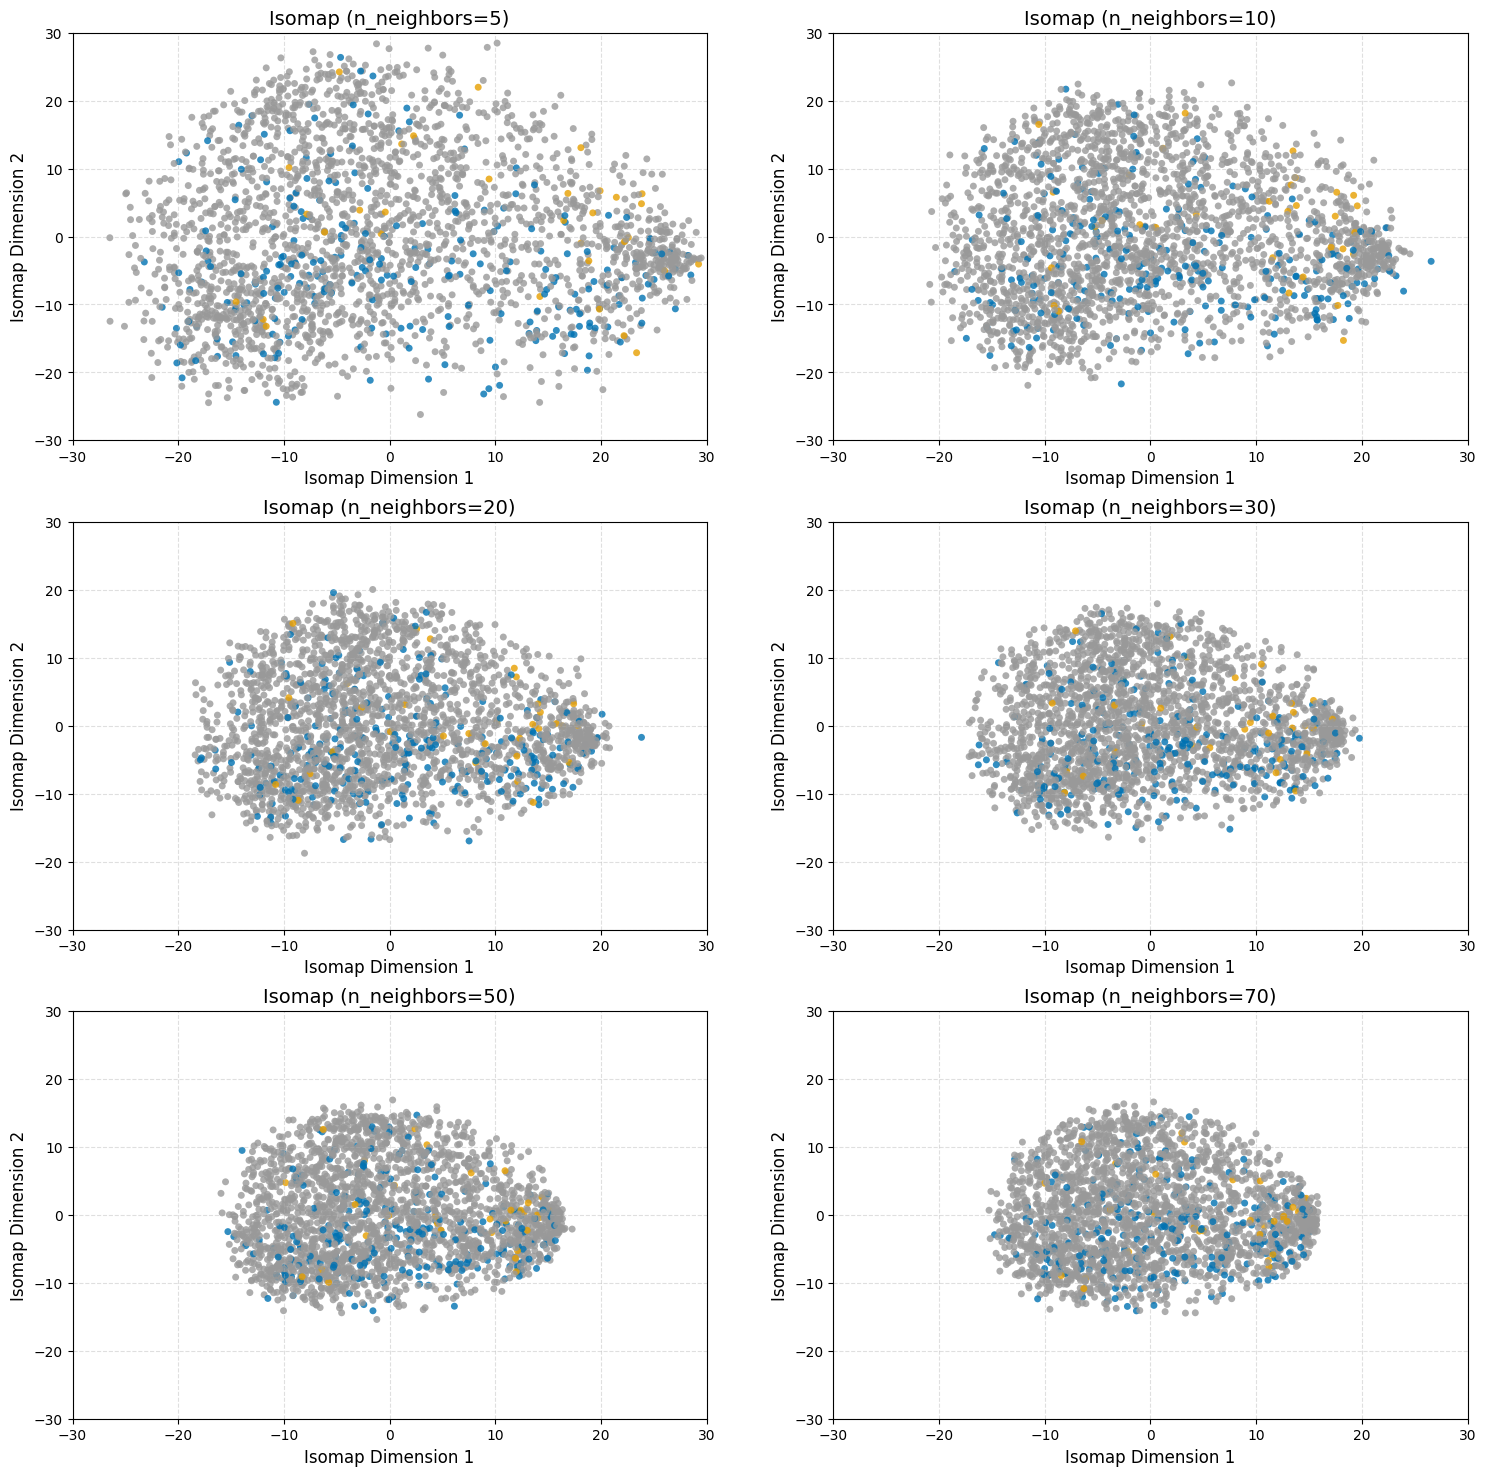

In [138]:
from sklearn.manifold import Isomap


# Neighbors values to test
neighbors_list = [5, 10, 20, 30,50,70]


#fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig, axes = plt.subplots(3, len(neighbors_list)//3, figsize=(18, 18))
axes = axes.flatten()

for k, ax in zip(neighbors_list, axes):
    isomap = Isomap(n_neighbors=k, n_components=2)
    X_iso = isomap.fit_transform(X_scaled)
    
    scatter = ax.scatter(
        X_iso[:, 0], X_iso[:, 1],
        c=col, s=25, alpha=0.8, edgecolor='none'
    )
    
    ax.set_title(f"Isomap (n_neighbors={k})", fontsize=14)
    ax.set_xlabel("Isomap Dimension 1", fontsize=12)
    ax.set_ylabel("Isomap Dimension 2", fontsize=12)
    ax.set_xlim(-30, 30)
    ax.set_ylim(-30, 30)
    ax.grid(True, linestyle='--', alpha=0.4)

# Add a shared colorbar
#fig.colorbar(scatter, ax=axes, orientation="horizontal", fraction=0.05, pad=0.1)
fig.subplots_adjust()
plt.show()


### Comparison and Curvature

#### **Compare the Isomap visualization to the t-SNE visualization**

When comparing the **Isomap** and **t-SNE** visualizations of the Yeast gene expression dataset, it is evident that **Isomap** performs better at preserving and revealing the **global structure** of the data.

In the Isomap plots (especially with `n_neighbors = 20–30`), the data points form a **continuous, smoothly varying manifold**, where clusters are arranged with meaningful relative positioning. This reflects how different protein localization patterns relate within the overall biological space, maintaining **global continuity** and **topological consistency**.

In contrast, the t-SNE visualizations (perplexity = 30–50) exhibit **clear and compact local clusters**, showing strong **local separability** between classes like `Class1` and `Top_MultiCombo`. However, the **distances between clusters in t-SNE do not carry global meaning** clusters can appear arbitrarily spaced or rotated without preserving the manifold’s true geometry.

Therefore, while **t-SNE excels in identifying localized groups and class separations**, **Isomap** is superior for understanding the **global relationships and overall manifold shape** of the Yeast gene expression data.  
In summary:  
> **Isomap → Best for global structure interpretation**  
> **t-SNE → Best for local cluster exploration**



**Isomap: Capturing the Global Geometry**

From the Isomap plots (`n_neighbors = 5–70`), we observe a **continuous, smoothly varying manifold** where clusters gradually blend into each other.  
- As the number of neighbors increases (especially around `n_neighbors = 20–30`), the data forms a **coherent global shape**  representing how different proteins or gene expressions are related in the overall high-dimensional space.  
- Isomap preserves **geodesic distances** (shortest paths along the manifold), maintaining the **true topological relationships** between distant points.  
- The global continuity seen in these plots reflects the **biological hierarchy** of protein localization patterns, making Isomap suitable for interpreting **broad structural trends** rather than fine-grained separations.

However, while global structure is preserved, **local cluster boundaries appear less distinct**, especially for overlapping classes like `Top_MultiCombo` and `Other`. This is expected since Isomap focuses on maintaining overall geometry rather than local density differences.

---

**t-SNE: Highlighting Local Separability**

In contrast, the t-SNE visualizations (across perplexities 5–100) show **strong local separability**:
- Each class forms **tight, clearly defined clusters**, where data points of similar expression patterns are grouped together.  
- The **boundaries between clusters are sharp**, and the structure within each cluster is well preserved ideal for detecting **micro-patterns or functional subgroups** among proteins.
- However, t-SNE does **not preserve global distances**  the **relative positioning of clusters** (e.g., how close one functional group is to another) does not reflect their true high-dimensional relationships.  
  This means that while clusters look well separated, the overall spatial arrangement may be misleading for interpreting **global biological relationships**.

---
**Final Verdict:**  
For the Yeast gene expression dataset, **Isomap** is **better at revealing the global structure** of the data. It maintains the **continuous topology** and reflects **how different protein expression profiles relate across the manifold**.  
In contrast, **t-SNE** provides superior **local clustering and class separability**, making it ideal for identifying **functional subgroups or expression-level similarities**, but less reliable for analyzing **global biological organization**.

Thus, **Isomap** is the preferred choice when the goal is to **interpret the overall structure and relationships** within the gene expression space, while **t-SNE** is best suited for **detailed exploration of local neighborhood patterns**.


#### **Understanding the Concept of a Data Manifold**

A **data manifold** refers to a lower-dimensional, continuous surface (or shape) embedded within a higher-dimensional space where the actual data points lie.  
Even though the Yeast gene expression dataset has over 100 features, the **true intrinsic structure** of the data likely exists on a manifold of much lower dimensionality meaning the gene expression patterns vary smoothly along a few meaningful biological directions (e.g., cellular function, localization, or expression intensity).

Manifold learning techniques like **Isomap** attempt to uncover this underlying structure by preserving **geodesic distances** the shortest paths along the manifold rather than simple Euclidean distances.  
If the data lies on a flat, simple manifold, it can be easily unfolded into a low-dimensional representation. However, if the manifold is **highly curved or nonlinear**, the mapping becomes more complex and harder to model or classify.

---

**Interpreting the Isomap Plot: Curvature and Complexity**

The Isomap visualizations (for neighborhood sizes between 5 and 70) show a **smooth but non-linear manifold structure**.  
- The data points do not form perfectly linear or planar clusters; instead, they **curve and overlap subtly**, especially for moderate neighborhood values (`n_neighbors = 20–30`).  
- This curvature suggests that the Yeast dataset resides on a **moderately curved manifold** not extremely twisted, but certainly non-flat.  
- The smooth transitions between clusters reflect **continuous variation in protein expression features**, consistent with biological systems where gene activity gradually shifts across functional types rather than forming sharp separations.

Thus, the Isomap plot reveals that the Yeast data manifold is **nonlinear and mildly complex**, with regions of overlap corresponding to mixed localization signals or multi-functional proteins.

---

**Relationship Between Manifold Complexity and Classification Difficulty**

The **complexity of the manifold** directly influences the **difficulty of classification**:

- In a **simple (flat) manifold**, the classes are easily separable by linear or shallow models because the relationships between features are relatively straightforward.
- In a **highly curved or nonlinear manifold**, class boundaries become **entangled** requiring complex, nonlinear models (like kernel SVMs, ensemble methods, or neural networks) to separate them effectively.

In the case of the Yeast dataset:
- The manifold’s moderate curvature means that **linear classifiers (e.g., Logistic Regression)** will struggle to draw clear decision boundaries.  
- **Overlapping regions** in the Isomap plot represent areas where multiple functional categories share similar feature signatures, making them **hard-to-learn samples**.
- Hence, achieving high accuracy likely requires **nonlinear classifiers** capable of modeling manifold curvature for example, **Random Forests**, **SVMs with RBF kernels**, or **deep neural networks**.

---

**Conclusion**

The Isomap visualization suggests that the **Yeast gene expression data lies on a moderately curved and nonlinear manifold**.  
This curvature reflects the **biological continuity and complexity** of protein localization patterns.  
As a result, **classification is moderately challenging**, especially in regions where classes overlap along the curved manifold.  

